In [108]:
import cv2
import os 
from matplotlib import pyplot as plt
import numpy as np
from scipy.signal import convolve2d 
from scipy.ndimage import gaussian_filter
from sklearn.metrics import mean_squared_error
import math

In [109]:
def openImage(image_name):
    f = cv2.imread(image_name)
    return f

In [110]:
def grayImage(f):
    f = cv2.cvtColor(f,cv2.COLOR_BGR2GRAY)
    plt.gray()
    return f

In [111]:
def printImage(string,func):
    print func.shape
    plt.xlabel(string)
    plt.imshow(func)
    #cv2.imshow(string,func)

In [112]:
def PSF(size,sigma):
    PSF=np.zeros((size,size))
    PSF[size//2,size//2]=1
    h = gaussian_filter(PSF, sigma)
    return h

In [113]:
def NOISE(mean,variance,Shape):
    standarddev=variance**0.5
    n=np.random.normal(mean,standarddev,(Shape))
    return n

In [114]:
def MakeBlurred(f,h):
    blurred= convolve2d(f, h, 'same')
    #blurred=np.uint8(blurred)
    return blurred

In [115]:
def blurNnoisy(blurred,n):
    g = blurred + n
    #g=np.uint8(g)
    return g

In [116]:
def calculateRestored(g,h,K):
    G=np.fft.fft2(g)
    #N=np.fft.fft2(n)
    H=np.fft.fft2(h,g.shape)
    conjH=np.matrix.conjugate(H)
    
    Hsquare=np.multiply(H,conjH)
    W=np.divide(conjH,(Hsquare+K))
    Fhat=np.multiply(W,G)
    fhat=np.fft.ifft2(Fhat)
    fhat=np.abs(fhat)
    #fhat=np.uint8(fhat)
    return fhat

In [117]:
def MSE(fhat,f):
    mse = mean_squared_error(fhat, f)
    #print mse
    return mse

In [118]:
def PSNR(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 10
    PIXEL_MAX = 255.0
    psnr = 20 * math.log10(PIXEL_MAX / math.sqrt(mse))
    return psnr

In [119]:
def weinerFilter(f,g,h,K):
    fhat=calculateRestored(g,h,K)

    mse = MSE(fhat,f)
    print "MSE : %f"%(mse)
    psnr=PSNR(fhat,f)
    print "PSNR : %f"%(psnr)
    return fhat

In [120]:
def TrueSNR(f,n):
    F=np.fft.fft2(f)
    N=np.fft.fft2(n)
    conjF=np.matrix.conjugate(F)
    conjN=np.matrix.conjugate(N)
    SNN=np.multiply(N,conjN)
    SFF=np.multiply(F,conjF)
    SNR=np.divide(SNN,SFF)
    return SNR

# Training

(220, 220, 3)


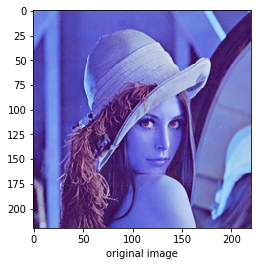

In [121]:
f=openImage('lena.png')
printImage("original image",f)

(220, 220)


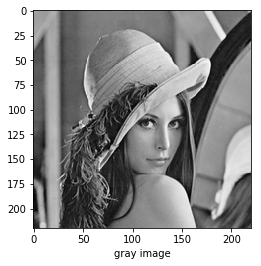

In [122]:
f=grayImage(f)
printImage("gray image",f)

In [130]:
sigma=raw_input("Enter a value for sigma for PSF : ")

Enter a value for sigma for PSF : 


In [131]:
if sigma:
    sigma=int(sigma)
else :
    sigma=1 ## optimum sigma for lena
    

In [132]:
size=raw_input("Enter a value for size for PSF : ")

Enter a value for size for PSF : 


In [133]:
if size:
    size=int(size)
else :
    size=5 ## optimum size for lena


(5, 5)


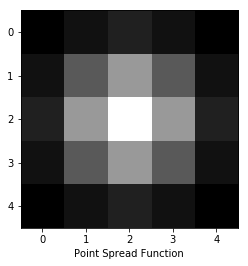

In [134]:
psf=PSF(size,sigma)
printImage("Point Spread Function",psf)

(220, 220)


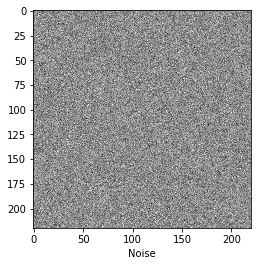

In [135]:
noise = NOISE(0,200,f.shape)
printImage("Noise",noise)

(220, 220)


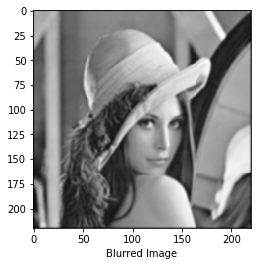

In [136]:
blurred = MakeBlurred(f,psf)
printImage("Blurred Image",blurred)

(220, 220)


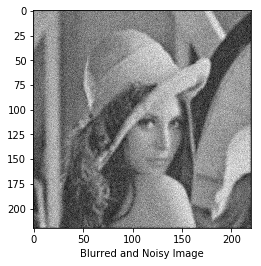

In [137]:
g=blurNnoisy(blurred,noise)
printImage("Blurred and Noisy Image",g)

In [145]:
K=raw_input("Enter a value for K : ")


Enter a value for K : 0.508


In [148]:
if K:
    K=float(K)
else :
    K=0.11
    

MSE : 2649.194599
PSNR : 13.899665
(220, 220)
K :  0.508


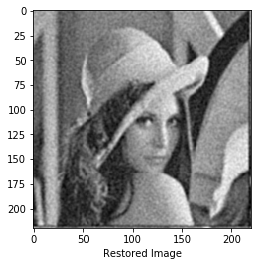

In [149]:
fhat = weinerFilter(f,g,psf,K)
printImage("Restored Image",fhat)
print "K : ",str(K)

In [150]:
truesnr=np.mean(TrueSNR(f,noise))
print "SNR : ",str(truesnr)
print "actual K : ",str(1/truesnr)

SNR :  (184.45471061359854+0j)
actual K :  (0.0054213849929527205+0j)


# Test

##  1. Harry


(600, 600, 3)


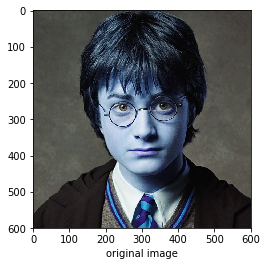

In [151]:
f_harry=openImage('harry.png')
printImage("original image",f_harry)

(600, 600)


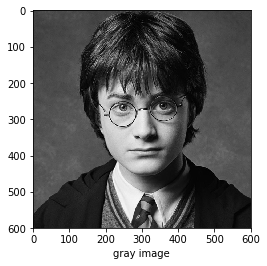

In [152]:
f_harry=grayImage(f_harry)
printImage("gray image",f_harry)

(600, 600)


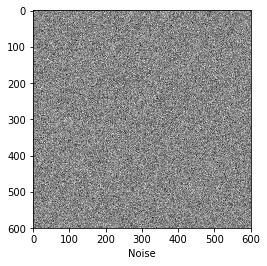

In [153]:
n_harry = NOISE(0,100,f_harry.shape)
printImage("Noise",n_harry)

(10, 10)


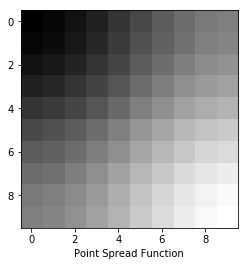

In [154]:
h_harry=PSF(10,10)
printImage("Point Spread Function",h_harry)

(600, 600)


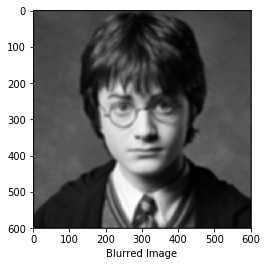

In [155]:
blurred_harry = MakeBlurred(f_harry,h_harry)
printImage("Blurred Image",blurred_harry)

### Test image : harry

(600, 600)


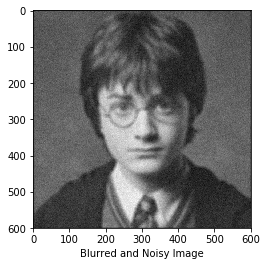

In [156]:
n_harry=cv2.resize(n_harry,f_harry.shape)
g_harry=blurNnoisy(blurred_harry,n_harry)
printImage("Blurred and Noisy Image",g_harry)

### Applying wiener filter on test image

MSE : 1201.659302
PSNR : 17.332990
(600, 600)
K :  0.508


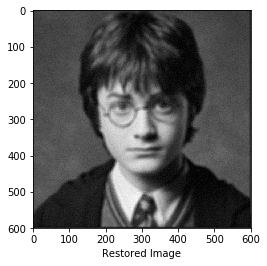

In [157]:
fhat_harry =weinerFilter(f_harry,g_harry,psf,K)
printImage("Restored Image",fhat_harry)
print "K : ",str(K)

In [158]:
truesnr=np.mean(TrueSNR(f_harry,n_harry))
print "SNR : ",str(truesnr)
print "actual K : ",str(1/truesnr)

SNR :  (135.45343542136536+0j)
actual K :  (0.007382610835149538+0j)


## 2. Car Number Plate

(250, 250, 3)


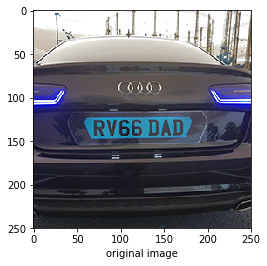

In [159]:
f_car=openImage('car.jpg')
printImage("original image",f_car)

(250, 250)


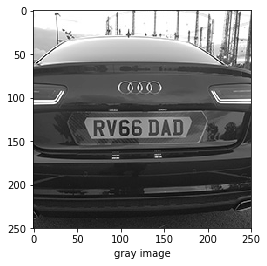

In [160]:
f_car=grayImage(f_car)
printImage("gray image",f_car)

(250, 250)


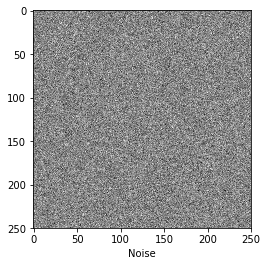

In [161]:
n_car = NOISE(0,300,f_car.shape)
printImage("Noise",n_car)

(5, 5)


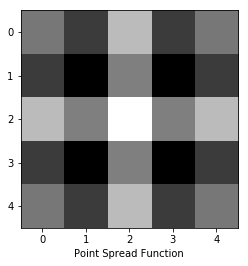

In [162]:
h_car=PSF(5,5)
printImage("Point Spread Function",h_car)

(250, 250)


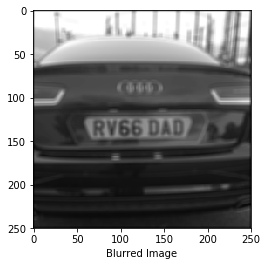

In [163]:
blurred_car = MakeBlurred(f_car,h_car)
printImage("Blurred Image",blurred_car)

### Test Image : car

(250, 250)


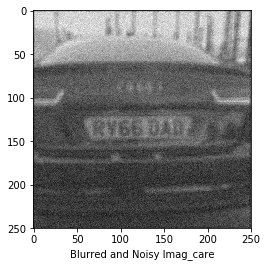

In [164]:
n_car=cv2.resize(n_car,f_car.shape)
g_car=blurNnoisy(blurred_car,n_car)
printImage("Blurred and Noisy Imag_care",g_car)

### Applying wiener filter on test image

MSE : 2483.458411
PSNR : 14.180235
(250, 250)
K :  0.508


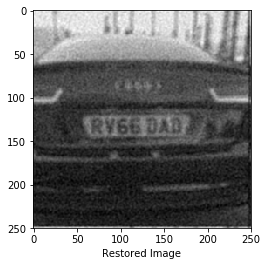

In [165]:
fhat_car =weinerFilter(f_car,g_car,psf,K)
printImage("Restored Image",fhat_car)
print "K : ",str(K)

In [166]:
truesnr=np.mean(TrueSNR(f_car,n_car))
print "SNR : ",str(truesnr)
print "actual K : ",str(1/truesnr)

SNR :  (91.86097530813745+0j)
actual K :  (0.01088601548857511+0j)


## 3. Street Sign

(360, 402, 3)


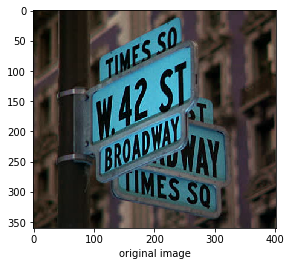

In [167]:
f_sign=openImage('streetsign1.jpg')
printImage("original image",f_sign)

(360, 402)


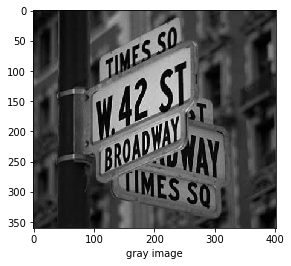

In [168]:
f_sign=grayImage(f_sign)
printImage("gray image",f_sign)

(402, 402)


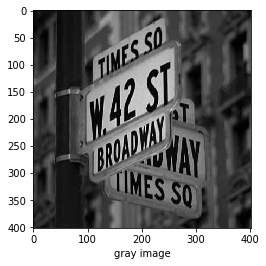

In [169]:
f_sign=cv2.resize(f_sign,(f_sign.shape[1],f_sign.shape[1]))
printImage("gray image",f_sign)

(402, 402)


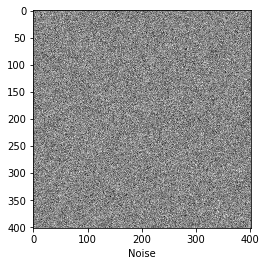

In [170]:
n_sign = NOISE(0,1000,f_sign.shape)
printImage("Noise",n_sign)

(5, 5)


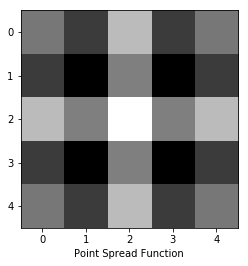

In [171]:
h_sign=PSF(5,5)
printImage("Point Spread Function",h_sign)

(402, 402)


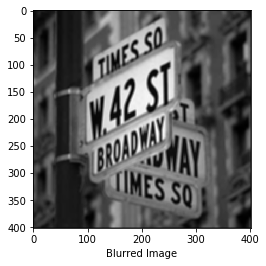

In [172]:
blurred_sign = MakeBlurred(f_sign,h_sign)
printImage("Blurred Image",blurred_sign)

### Test image : street sign

(402, 402)


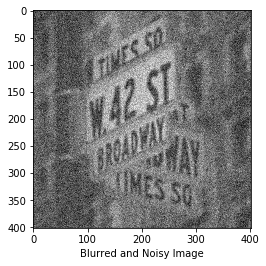

In [173]:
n_sign=cv2.resize(n_sign,f_sign.shape)

g_sign=blurNnoisy(blurred_sign,n_sign)
printImage("Blurred and Noisy Image",g_sign)

### Applying wiener filter on test image

MSE : 1438.915653
PSNR : 16.550450
(402, 402)
K :  0.508


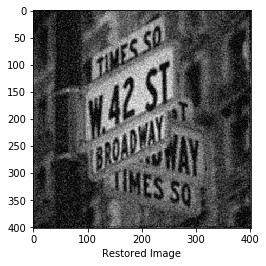

In [174]:
fhat_sign =weinerFilter(f_sign,g_sign,psf,K)
printImage("Restored Image",fhat_sign)
print "K : ",str(K)

In [175]:
truesnr=np.mean(TrueSNR(f_sign,n_sign))
print "SNR : ",str(truesnr)
print "actual K : ",str(1/truesnr)

SNR :  (4522.44843643259+0j)
actual K :  (0.00022111916013106006+0j)


In [176]:
cv2.waitKey(0)
cv2.destroyAllWindows()